In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE


In [2]:
##Importing File
from google.colab import drive
drive.mount('google_drive')

Mounted at google_drive


In [3]:
#importing file
filepath = '/content/google_drive/MyDrive/creditcard.csv'
creditcard = pd.read_csv(filepath)

## **EDA**

In [4]:
print(creditcard.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print(creditcard.shape)

(284807, 31)


In [6]:
print(creditcard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
creditcard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
#drop columns
creditcard = creditcard.drop(['Time'],axis=1)

<Axes: xlabel='Amount'>

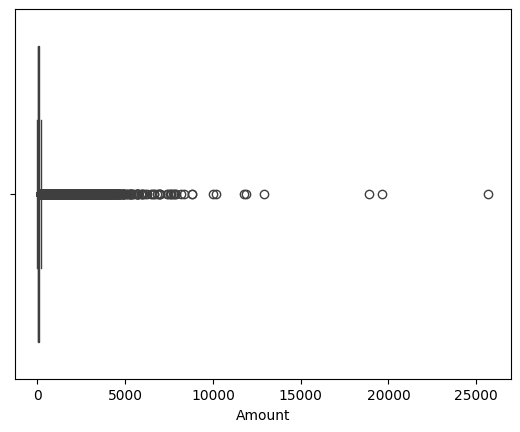

In [9]:
#detecting outliers
sns.boxplot(x=creditcard['Amount'])

### **EDA VISUALIZATION**

/tmp/ipython-input-409443965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=creditcard, palette=['#4CAF50', '#F44336'])


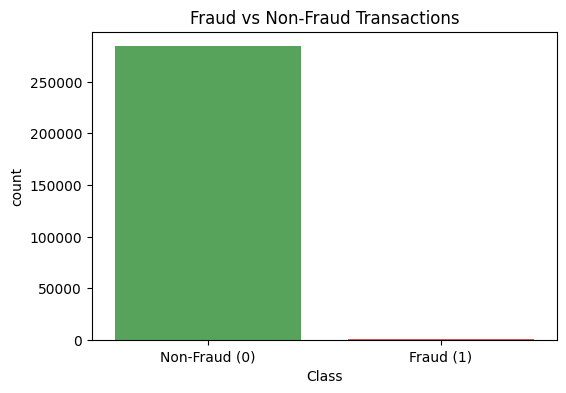

In [10]:
# Check target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=creditcard, palette=['#4CAF50', '#F44336'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

In [11]:
#Percentage of fraud
fraud_percent = creditcard['Class'].mean() * 100
print(f"Fraud cases: {fraud_percent:.4f}%")

Fraud cases: 0.1727%


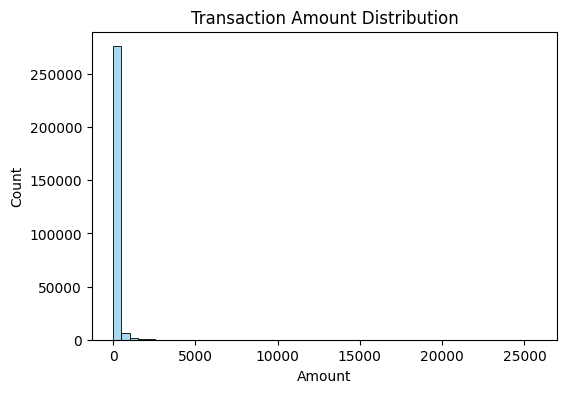

In [12]:
#Histogram of transaction amount
plt.figure(figsize=(6,4))
sns.histplot(creditcard['Amount'], bins=50, color='skyblue')
plt.title("Transaction Amount Distribution")
plt.show()

/tmp/ipython-input-843130798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=creditcard, palette=['#4CAF50', '#F44336'])


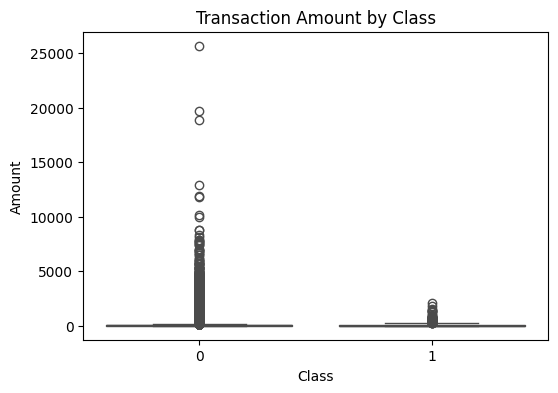

In [13]:
#Boxplot of transaction amount by class
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=creditcard, palette=['#4CAF50', '#F44336'])
plt.title("Transaction Amount by Class")
plt.show()

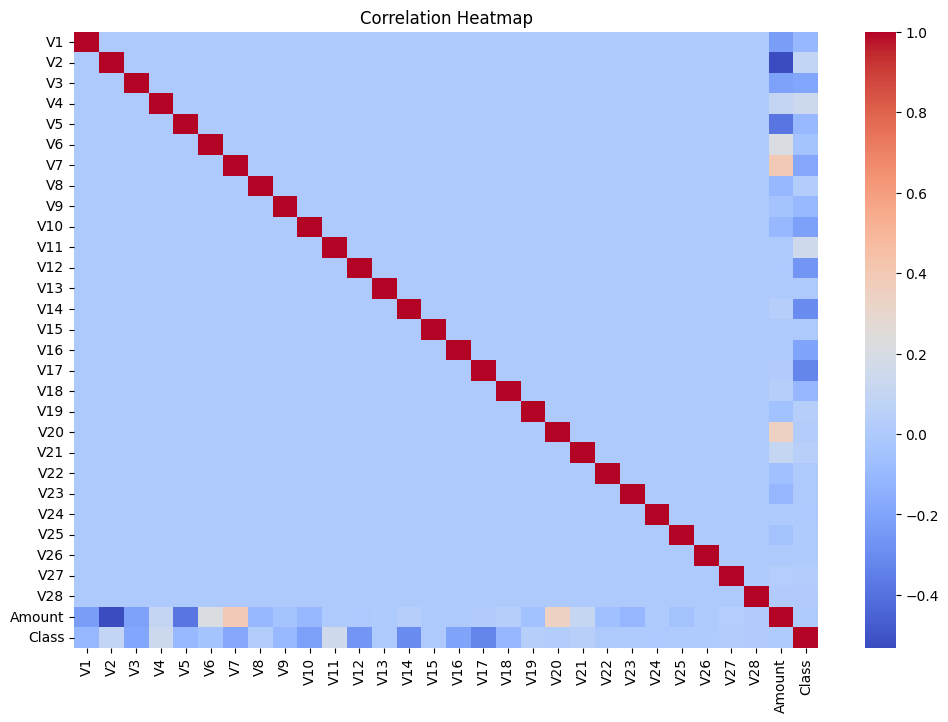

In [14]:
#Correlation heatmap
plt.figure(figsize=(12,8))
corr = creditcard.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipython-input-2162822718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='V2', data=creditcard, palette=['#4CAF50', '#F44336'])


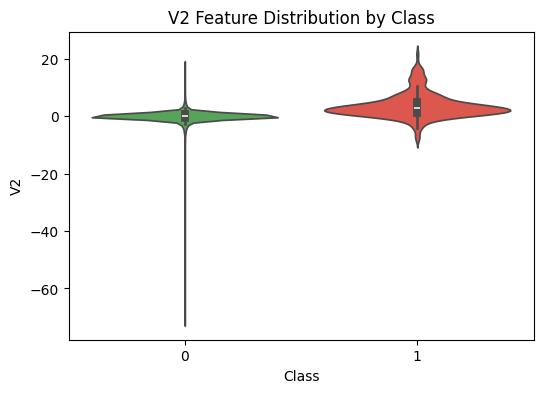

In [15]:
#Violin plot for a feature (e.g., V2) vs Class
plt.figure(figsize=(6,4))
sns.violinplot(x='Class', y='V2', data=creditcard, palette=['#4CAF50', '#F44336'])
plt.title("V2 Feature Distribution by Class")
plt.show()

/tmp/ipython-input-2777942462.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==0, col], label='Non-Fraud', shade=True)
/tmp/ipython-input-2777942462.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==1, col], label='Fraud', shade=True)


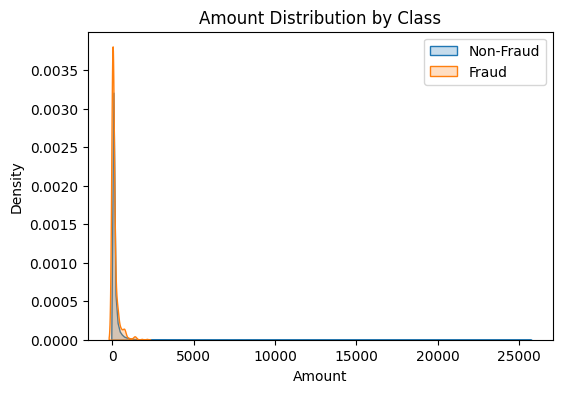

/tmp/ipython-input-2777942462.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==0, col], label='Non-Fraud', shade=True)
/tmp/ipython-input-2777942462.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==1, col], label='Fraud', shade=True)


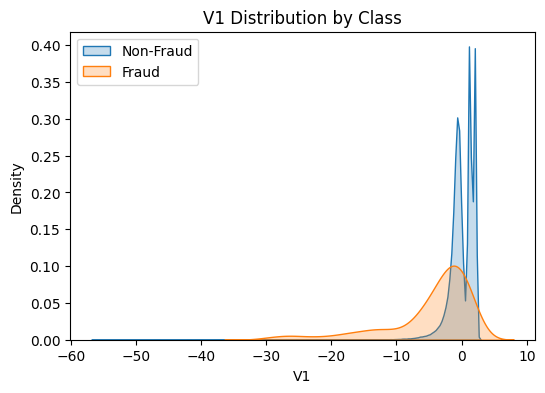

/tmp/ipython-input-2777942462.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==0, col], label='Non-Fraud', shade=True)
/tmp/ipython-input-2777942462.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==1, col], label='Fraud', shade=True)


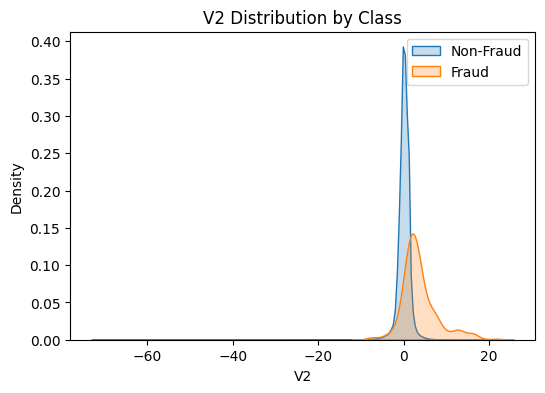

/tmp/ipython-input-2777942462.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==0, col], label='Non-Fraud', shade=True)
/tmp/ipython-input-2777942462.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(creditcard.loc[creditcard['Class']==1, col], label='Fraud', shade=True)


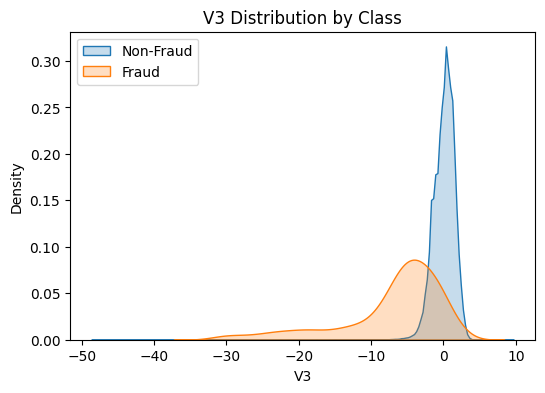

In [16]:
import numpy as np
creditcard['Log_Amount'] = np.log1p(creditcard['Amount'])  # log1p handles zero values

features = ['Amount', 'V1', 'V2', 'V3']  # choose a few at a time
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(creditcard.loc[creditcard['Class']==0, col], label='Non-Fraud', shade=True)
    sns.kdeplot(creditcard.loc[creditcard['Class']==1, col], label='Fraud', shade=True)
    plt.title(f"{col} Distribution by Class")
    plt.legend()
    plt.show()


<Axes: xlabel='V2', ylabel='V5'>

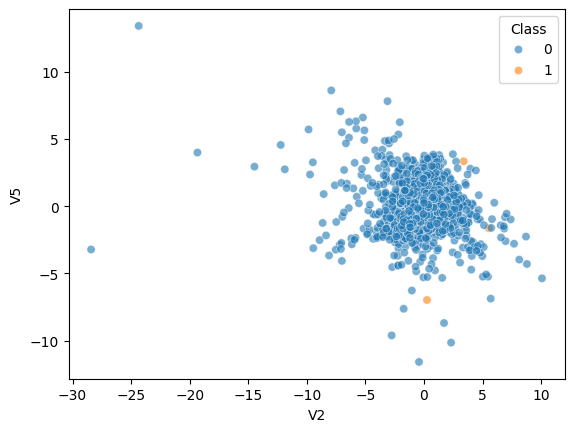

In [17]:
sns.scatterplot(
    data=creditcard.sample(5000),
    x='V2',
    y='V5',
    hue='Class',
    alpha=0.6
)


# **Preporcessing the Data**

In [18]:
from imblearn.over_sampling import SMOTE

X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

In [19]:
#feature scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = creditcard['Amount'].values
creditcard['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [20]:
#Handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [21]:
#train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Comparision**

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Precision": classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        "Recall": classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        "F1-score": classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

cc_result = pd.DataFrame(results)
print(cc_result.sort_values(by="ROC-AUC", ascending=False))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:41:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
                 Model  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression   0.062069  0.918367  0.116279  0.980380
1        Random Forest   0.986667  0.755102  0.855491  0.957996
3              XGBoost   0.928571  0.795918  0.857143  0.945009
2    Gradient Boosting   0.737500  0.602041  0.662921  0.785511
4             LightGBM   0.155556  0.285714  0.201439  0.581161


In [ ]:
from sklearn.model_selection import GridSearchCV

# XGBoost parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_grid = GridSearchCV(
    xgb_model,
    param_grid=xgb_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best XGBoost Recall:", xgb_grid.best_score_)

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(
    rf_model,
    param_grid=rf_param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF Recall:", rf_grid.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
plt.figure(figsize=(10,6))

for name, model in {
    'XGBoost (Tuned)': xgb_grid.best_estimator_,
    'Random Forest (Tuned)': rf_grid.best_estimator_,
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train)
}.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()
